In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Load Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
sample.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


### EDA

In [6]:
duplicate_rows_data = train[train.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 14)


In [7]:
desc = pd.DataFrame(index = list(train))
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['type'] = train.dtypes
desc = pd.concat([desc, train.describe().T.drop('count', axis = 1)], axis = 1)
desc

,count,nunique,%unique,null,type,mean,std,min,25%,50%,75%,max
id,165034,165034,100.000000,0,int64,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034,23221,14.070434,0,int64,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
Surname,165034,2797,1.694802,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,165034,457,0.276913,0,int64,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Geography,165034,3,0.001818,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,165034,2,0.001212,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,165034,71,0.043021,0,float64,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034,11,0.006665,0,int64,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034,30075,18.223518,0,float64,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034,4,0.002424,0,int64,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00


In [8]:
num_nan = train.isna().sum()
print("Number of nans: ", num_nan)

Number of nans:  id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


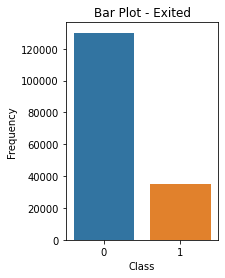

In [9]:
plt.subplot(1, 2, 1)
sns.countplot(data=train, x="Exited")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Bar Plot - Exited")
plt.show()

In [10]:
train.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### Feature Engineering

In [11]:
def data_convert(df):
    # Define a mapping dictionary, Male is 0, Female is 1
    gender_mapping = {'Male': 0, 'Female': 1}
    df['Gender'] = df['Gender'].map(gender_mapping)
    
    # one-hot encode 
    df = pd.get_dummies(df, columns=['Geography', 'Age_Category', 
                                     'Credit_Score_Range', 'Tenure', 'NumOfProducts', 'Geo_Gender'])
    
    # label encode the surnames
    label_encoder = LabelEncoder()
    df['Surname'] = label_encoder.fit_transform(df['Surname'])
    #df['Age_Category'] = label_encoder.fit_transform(df['Age_Category'])
    #df['Credit_Score_Range'] = label_encoder.fit_transform(df['Credit_Score_Range'])
    
    return df

In [12]:
def age_tr(df) : 
    # bin labels ['18-30', '30-40', '40-50', '50-60', '60+']
    df['Age_Category'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100],
                                labels = ['18-30', '30-40', '40-50', '50-60', '60+'])
    return df

In [13]:
def cred_score_tr(df) : 
    # bin labels ['0-300', '300-600', '600-700', '700-800', '900+']
    df['Credit_Score_Range'] = pd.cut(df['CreditScore'], bins=[0, 300, 600, 700, 800, 900],
                                      labels = ['0-300', '300-600', '600-700', '700-800', '900+'])
    return df

In [14]:
def geo_gender_tr(df) : 
    df['Geo_Gender'] = df['Geography'] + '_' + df['Gender']
    return df

In [15]:
def feat_engineering(df):
    df = age_tr(df)
    df = cred_score_tr(df)
    df = geo_gender_tr(df)
    
    df = df.fillna(np.mean(df))
    df = data_convert(df)
    df = df.drop(columns = ['CustomerId'])
    
    return df

In [16]:
train = train.drop_duplicates()
y = train['Exited']
X = train.drop(columns = ['Exited', 'id'])

scaler = StandardScaler()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

X_train = feat_engineering(X_train)
X_val = feat_engineering(X_val)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
X_train

,Surname,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,...,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geo_Gender_France_Female,Geo_Gender_France_Male,Geo_Gender_Germany_Female,Geo_Gender_Germany_Male,Geo_Gender_Spain_Female,Geo_Gender_Spain_Male
0,-0.647151,0.665337,1.137804,2.014409,0.113446,-1.747314,1.004960,0.244710,0.867638,-0.515122,...,1.063642,-1.020833,-0.134154,-0.053207,1.770578,-0.699710,-0.332398,-0.351938,-0.322994,-0.378497
1,1.003485,0.153177,1.137804,2.352417,-0.884554,-1.747314,-0.995065,-1.069158,0.867638,-0.515122,...,-0.940166,0.979592,-0.134154,-0.053207,1.770578,-0.699710,-0.332398,-0.351938,-0.322994,-0.378497
2,-0.940217,-2.657457,-0.878886,0.775047,-0.884554,0.572307,-0.995065,0.345270,0.867638,-0.515122,...,-0.940166,0.979592,-0.134154,-0.053207,-0.564787,1.429164,-0.332398,-0.351938,-0.322994,-0.378497
3,0.222850,0.677829,-0.878886,0.099032,0.944915,0.572307,-0.995065,1.336568,-1.152554,1.941289,...,1.063642,-1.020833,-0.134154,-0.053207,-0.564787,-0.699710,-0.332398,2.841410,-0.322994,-0.378497
4,1.332035,2.414176,-0.878886,-0.802322,-0.884554,-1.747314,1.004960,-1.008867,-1.152554,-0.515122,...,-0.940166,0.979592,-0.134154,-0.053207,-0.564787,-0.699710,-0.332398,-0.351938,-0.322994,2.642029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140273,-0.319915,0.140685,-0.878886,0.775047,0.779136,0.572307,-0.995065,0.008527,-1.152554,1.941289,...,1.063642,-1.020833,-0.134154,-0.053207,-0.564787,-0.699710,-0.332398,2.841410,-0.322994,-0.378497
140274,-0.319915,1.177497,-0.878886,0.549709,-0.884554,0.572307,-0.995065,-0.473164,0.867638,-0.515122,...,-0.940166,0.979592,-0.134154,-0.053207,-0.564787,1.429164,-0.332398,-0.351938,-0.322994,-0.378497
140275,1.162503,1.202481,1.137804,0.099032,-0.884554,0.572307,-0.995065,1.100454,0.867638,-0.515122,...,-0.940166,0.979592,-0.134154,-0.053207,1.770578,-0.699710,-0.332398,-0.351938,-0.322994,-0.378497
140276,-1.737937,0.353045,1.137804,1.113055,-0.884554,0.572307,1.004960,-1.743632,0.867638,-0.515122,...,-0.940166,0.979592,-0.134154,-0.053207,1.770578,-0.699710,-0.332398,-0.351938,-0.322994,-0.378497


In [18]:
X_train.isna().sum()

Surname                       0
CreditScore                   0
Gender                        0
Age                           0
Balance                       0
HasCrCard                     0
IsActiveMember                0
EstimatedSalary               0
Geography_France              0
Geography_Germany             0
Geography_Spain               0
Age_Category_18-30            0
Age_Category_30-40            0
Age_Category_40-50            0
Age_Category_50-60            0
Age_Category_60+              0
Credit_Score_Range_0-300      0
Credit_Score_Range_300-600    0
Credit_Score_Range_600-700    0
Credit_Score_Range_700-800    0
Credit_Score_Range_900+       0
Tenure_0                      0
Tenure_1                      0
Tenure_2                      0
Tenure_3                      0
Tenure_4                      0
Tenure_5                      0
Tenure_6                      0
Tenure_7                      0
Tenure_8                      0
Tenure_9                      0
Tenure_1

### EDA2

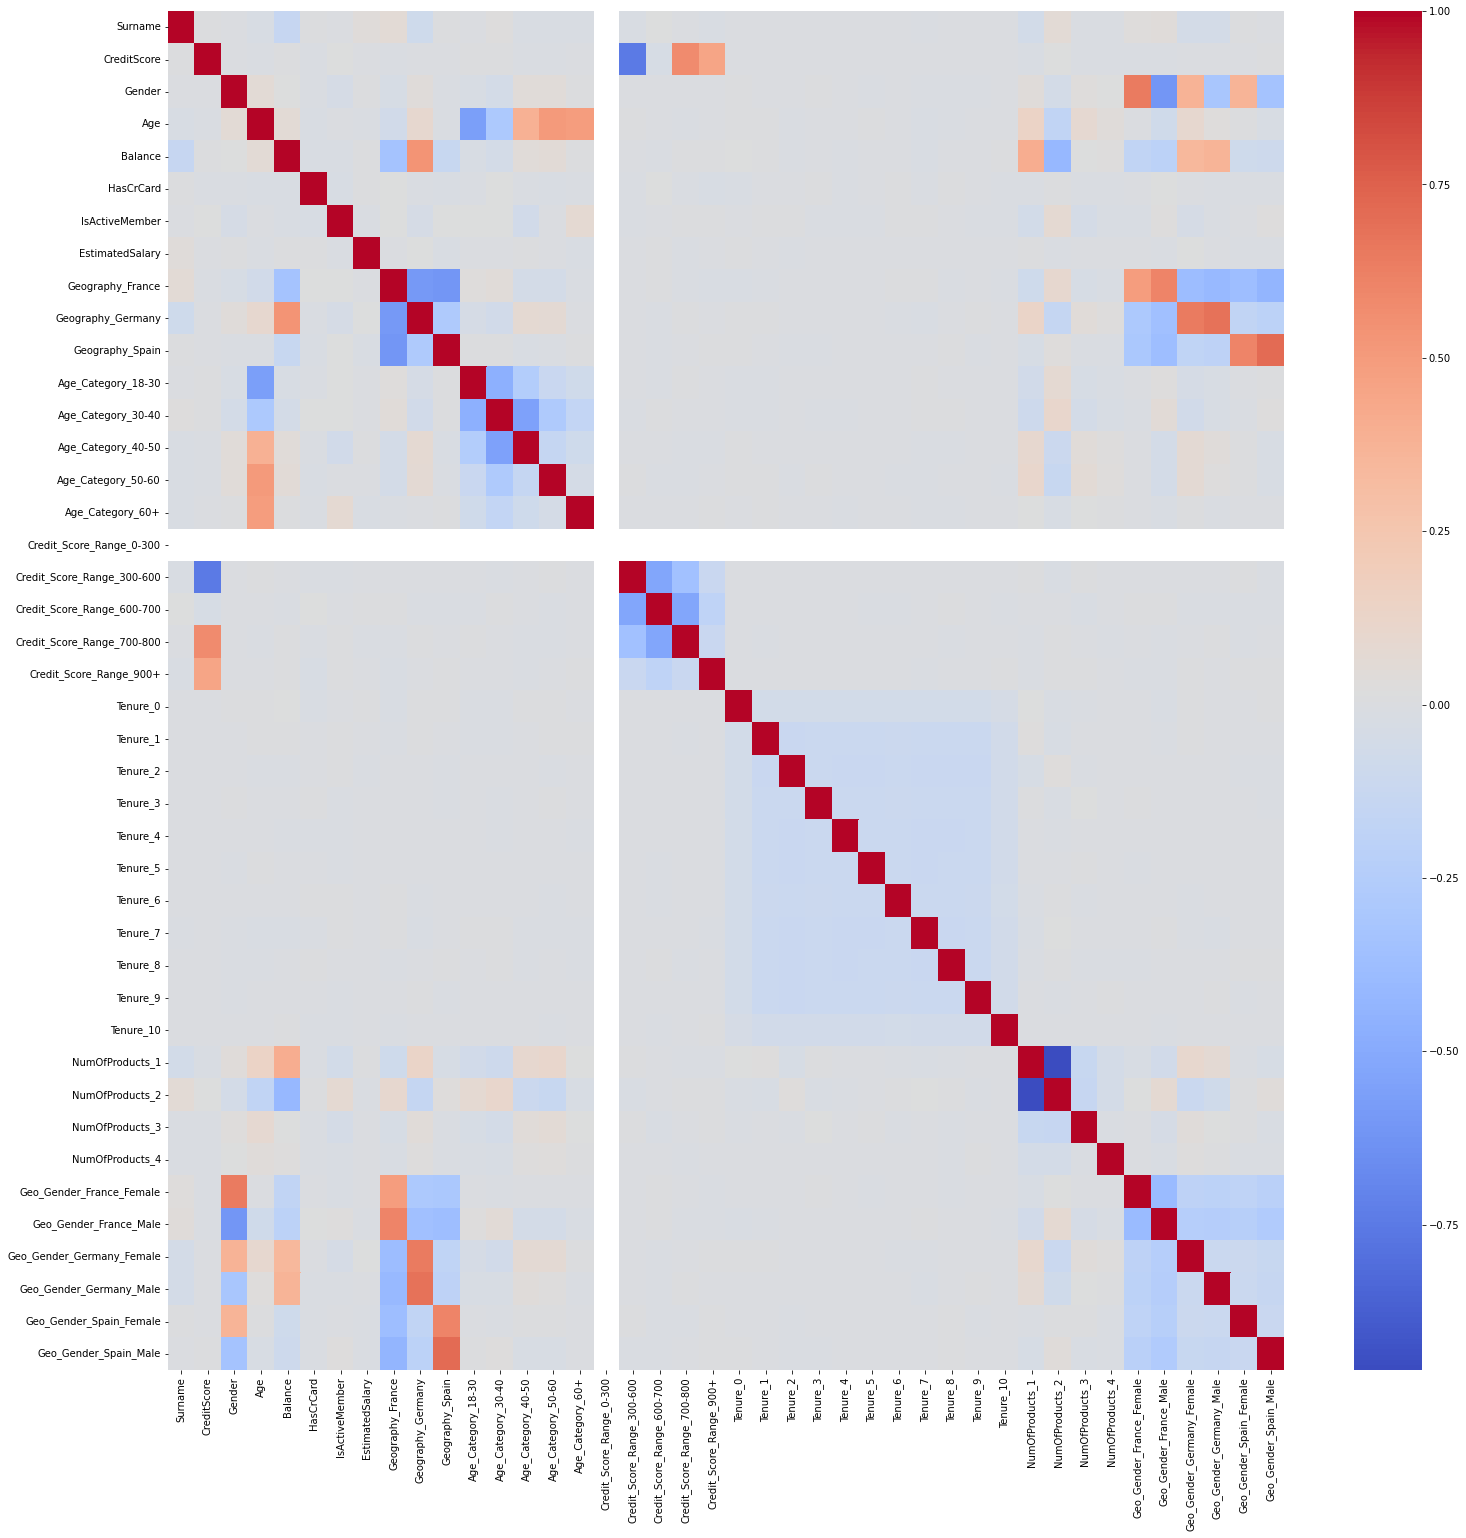

In [19]:
plt.figure(figsize = (25,25))
sns.heatmap(X_train.corr(), annot=False, cmap="coolwarm")
plt.show()

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
import time

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

modelLR = LogisticRegression(random_state = 42, max_iter = 300, n_jobs = -1)

paramsLR = {
    'C': [1e-2, 1, 3, 5, 10]}


    
grid_searchLR = GridSearchCV(modelLR, param_grid=paramsLR, 
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3,
                                    return_train_score = True)

start = time.time()
grid_searchLR.fit(X_train, y_train)
end = time.time()
print(end - start)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
22.395878076553345


In [21]:
print("Best Hyperparameters:", grid_searchLR.best_params_)

Best Hyperparameters: {'C': 1}


In [22]:
from sklearn.metrics import accuracy_score
# Get the best logistic regression model
LR = grid_searchLR.best_estimator_

# Evaluate the best model on the test set
y_pred = LR.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Test Accuracy: 0.86055905639037
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     19538
           1       0.73      0.53      0.62      5218

    accuracy                           0.86     24756
   macro avg       0.81      0.74      0.77     24756
weighted avg       0.85      0.86      0.85     24756



### RFC

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Test Accuracy: 0.8588221037324285
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     19538
           1       0.72      0.54      0.62      5218

    accuracy                           0.86     24756
   macro avg       0.80      0.74      0.76     24756
weighted avg       0.85      0.86      0.85     24756



### XGBoost

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier()

paramsXGB = {
    'objective': ['binary:logistic'],
    'eta': [0.01, 0.1, 0.2, 0.3, 0.6, 1],  # Learning rate
    'max_depth' : [2, 5, 10, 100],
    'min_child_weight': [2, 5, 10], 
    'n_estimators': [100, 300, 1000],  # Number of boosting rounds
}

random_searchXGB = RandomizedSearchCV(xgb, param_distributions=paramsXGB,
                                   n_iter=15, scoring = 'f1',
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=42,
                                     return_train_score = True)


start = time.time()
random_searchXGB.fit(X_train, y_train)
end = time.time()
print(end - start)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
855.5273261070251


In [25]:
print("Best Hyperparameters:", random_searchXGB.best_params_)

Best Hyperparameters: {'objective': 'binary:logistic', 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 5, 'eta': 0.6}


In [26]:
# Get the best xgb model
XGB = random_searchXGB.best_estimator_

# Evaluate the best model on the test set
y_pred = XGB.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Test Accuracy: 0.8610841816125384
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     19538
           1       0.72      0.55      0.63      5218

    accuracy                           0.86     24756
   macro avg       0.81      0.75      0.77     24756
weighted avg       0.85      0.86      0.85     24756



### Submission

In [32]:
test = pd.read_csv('test.csv')
ids = test['id']
test = test.drop(['id'], axis=1)
test = feat_engineering(test)

test = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [33]:
test_pred = XGB.predict_proba(test)
test_pred

array([[0.9647548 , 0.03524519],
       [0.05290455, 0.94709545],
       [0.9839147 , 0.01608533],
       ...,
       [0.9845529 , 0.01544707],
       [0.8553552 , 0.14464478],
       [0.6859727 , 0.3140273 ]], dtype=float32)

In [37]:
submit = pd.DataFrame(ids, columns = ['id'])

submit['Exited'] = test_pred[:,1]

submit.head()

,id,Exited
0,165034,0.035245
1,165035,0.947095
2,165036,0.016085
3,165037,0.311318
4,165038,0.271528


In [38]:
submit.to_csv('submission.csv', index=False)